In [421]:
import time
import statistics
import numpy as np
from networkx import nx
import matplotlib.pyplot as plt

In [422]:
vert = 100
edg = 500

In [444]:
global times
times = []

In [445]:
# Function-decorator for calculate time complexity
def pin_time(func):
    def wrapper(vector, *args, **kwargs):
        t_start = time.time()
        func(vector, *args, **kwargs)
        t_end = time.time()
        times.append(t_end-t_start)
    return wrapper

In [425]:
# Function for graph generation
def generate_graph(v, e):
    graph = nx.gnm_random_graph(v, e)
    return graph

In [426]:
# Function for getting an adjacency matrix
def adjacency_matrix(graph):
    adj_matrix = [[0 for _ in range(len(graph))] for _ in range(len(graph))]
    for edge in graph.edges:
        adj_matrix[edge[0]][edge[1]] = adj_matrix[edge[1]][edge[0]]  = np.random.randint(1,100)
    return adj_matrix

In [428]:
# Function fir converting adjacency matrix to adjecency list
def convert_adj_matrix_to_list(adj_matrix):
    adj_list = {i:[] for i in range(vert)}
    for i in range(len(adj_matrix)):
        for j in range(len(row)):
            if adj_matrix[i][j] != 0:
                adj_list[i].append((j, adj_matrix[i][j]))
    return adj_list

In [429]:
# Function for graph visualization
def show_graph(graph):
    plt.figure(figsize=(50, 50))
    nx.draw(graph)
    plt.show()

In [430]:
# Generate random graph with 100 vertices and 500 edges
graph = generate_graph(vert, edg)

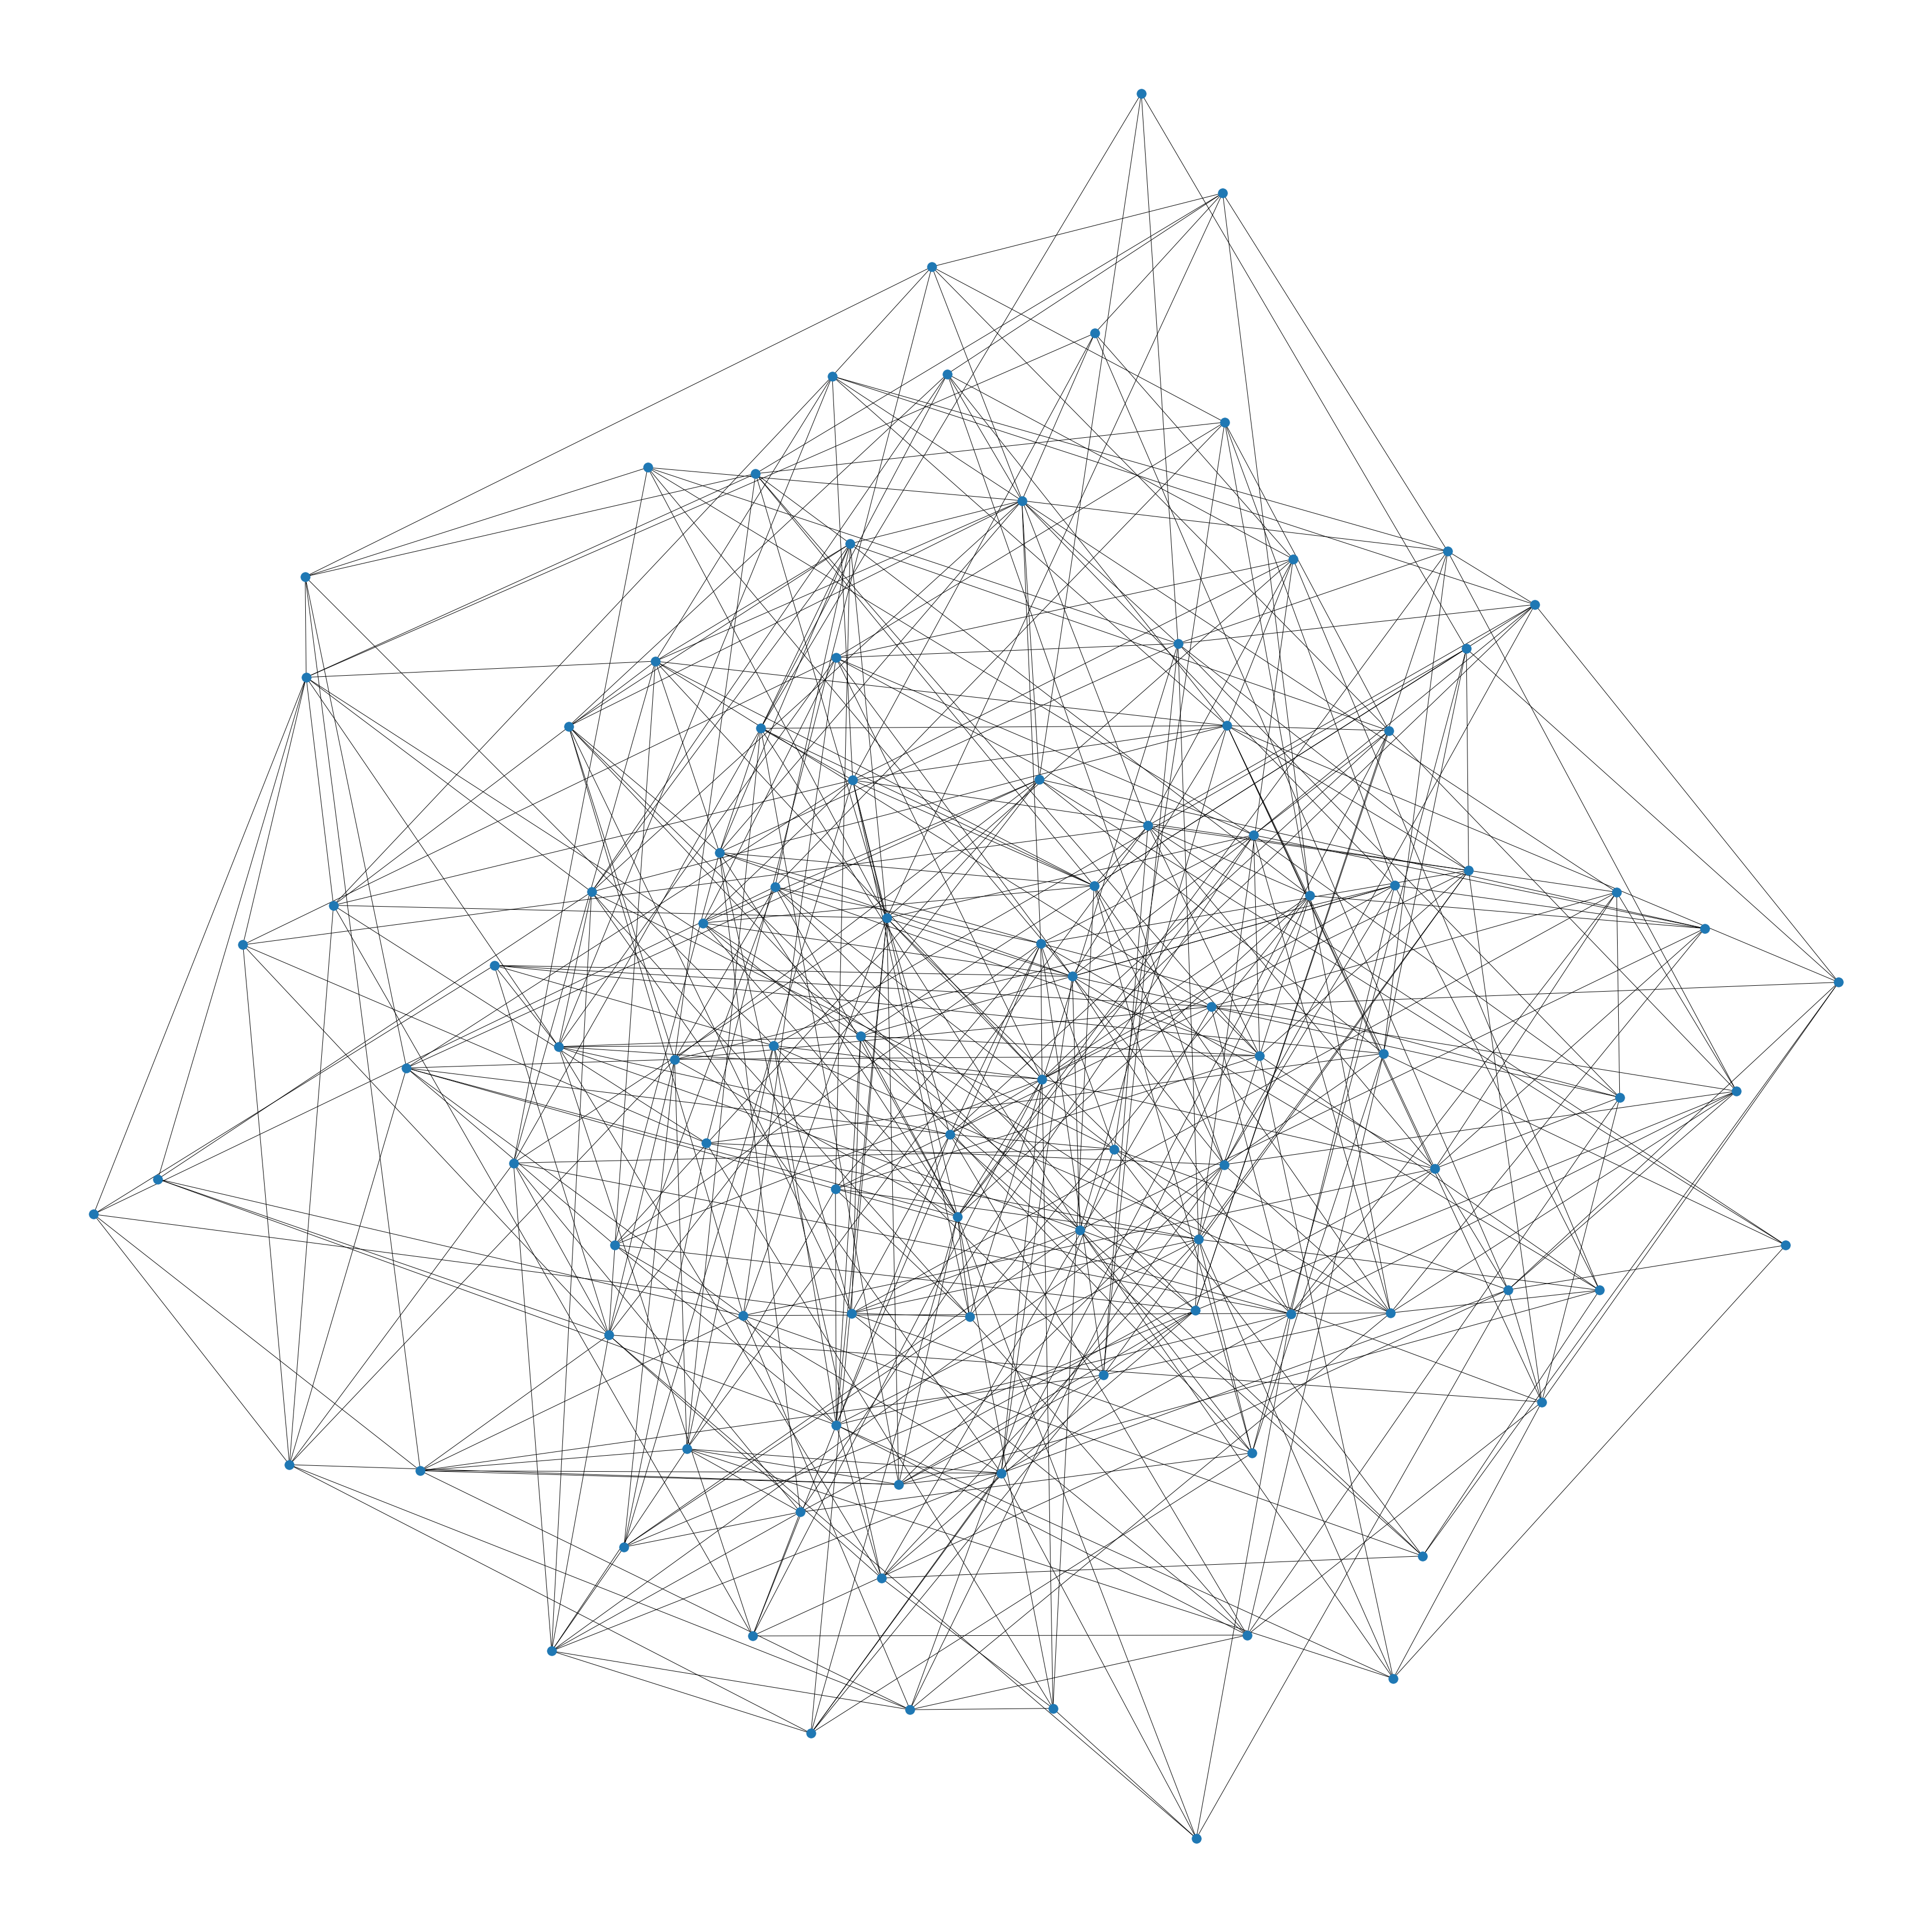

In [431]:
show_graph(graph)

In [432]:
# Get adjacency matrix and show the first three rows of it
adj_matrix = adjacency_matrix(graph)
for row in adj_matrix[:3]:
    print(row)

[0, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 0, 14, 33, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 81, 0, 0, 0, 0, 86, 0, 0, 0, 0, 0, 90, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 94, 0, 0, 0, 0, 0, 89, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 36, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 72, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 61, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0, 0, 0, 0, 0]
[74, 0, 0, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97, 0, 0, 0, 65, 0, 0, 0, 0, 0, 0, 0, 0, 0, 45, 0, 11, 0, 0, 0, 53, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 71, 0, 82, 0, 0, 0, 0, 0, 0, 0, 48, 5, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0]


In [433]:
# Get adjacency list and show the first three rows of it
adj_list = convert_adj_matrix_to_list(adj_matrix)

for row in list(adj_list.items())[:3]:
    print(row)

(0, [(2, 74), (12, 45), (14, 14), (15, 33), (29, 81), (34, 86), (40, 90), (70, 94), (76, 89)])
(1, [(5, 12), (22, 74), (33, 36), (46, 72), (62, 61), (65, 6), (92, 17)])
(2, [(0, 74), (3, 21), (24, 97), (28, 65), (38, 45), (40, 11), (44, 53), (56, 71), (58, 82), (66, 48), (67, 5), (69, 4), (73, 2), (89, 18), (97, 4)])


### Dijkstra algorithm

In [434]:
# Function for finding minimum distance
def min_dist(q, dist):
    min_node = None
    for node in q:
        if min_node == None:
            min_node = node
        elif dist[node] < dist[min_node]:
            min_node = node

    return min_node

In [456]:
# Implementation for Dijkstra algorithm

@pin_time
def dijkstra(graph, source):
    q = set() # queue of vertices to explore
    dist = {} # lenght of shortest path from source to v
    paths = [[] for _ in range(100)] # shortest paths from source to vertices
    

    for v in graph.keys():       # initialization
        dist[v] = 1000000000      # unknown distance from source to v
        q.add(v)                # all nodes initially in q (unvisited nodes)

    # distance from source to source = 0 (graph doesn't include self-loops)
    dist[source] = 0

    while q:
        # node with the least distance selected first
        u = min_dist(q, dist)

        q.remove(u)

        if u in graph.keys():
            for v, weight in graph[u]:
                if dist[v] > dist[u] + weight:
                    # a shorter path to v has been found
                    dist[v] = dist[u] + weight
                    paths[v] = paths[u] + [v]

    return paths, dist

In [457]:
dijkstra(adj_list, 0)

([[],
  [14, 59, 56, 17, 32, 44, 11, 94, 21, 63, 5, 1],
  [14, 59, 37, 7, 89, 2],
  [14, 59, 56, 91, 3],
  [14, 12, 4],
  [14, 59, 56, 17, 32, 44, 11, 94, 21, 63, 5],
  [14, 12, 4, 19, 6],
  [14, 59, 37, 7],
  [14, 46, 47, 8],
  [14, 59, 56, 17, 68, 9],
  [14, 59, 56, 17, 32, 44, 11, 94, 10],
  [14, 59, 56, 17, 32, 44, 11],
  [14, 12],
  [14, 95, 39, 13],
  [14],
  [15],
  [14, 59, 56, 91, 3, 16],
  [14, 59, 56, 17],
  [14, 95, 39, 13, 18],
  [14, 12, 4, 19],
  [14, 46, 47, 8, 20],
  [14, 59, 56, 17, 32, 44, 11, 94, 21],
  [14, 46, 70, 26, 22],
  [14, 12, 4, 66, 99, 87, 23],
  [14, 95, 24],
  [14, 59, 56, 17, 32, 44, 25],
  [14, 46, 70, 26],
  [14, 59, 37, 7, 89, 2, 67, 27],
  [14, 59, 56, 17, 32, 44, 11, 28],
  [14, 59, 37, 7, 29],
  [14, 59, 56, 30],
  [14, 59, 37, 7, 89, 2, 69, 31],
  [14, 59, 56, 17, 32],
  [14, 95, 36, 33],
  [34],
  [14, 95, 35],
  [14, 95, 36],
  [14, 59, 37],
  [14, 59, 37, 96, 88, 38],
  [14, 95, 39],
  [15, 40],
  [14, 59, 56, 17, 32, 44, 41],
  [14, 95, 36, 

In [454]:
global times
times = []

for _ in range(10):
    dijkstra(adj_list, np.random.randint(0, vert))

mean = statistics.mean(times)
mean

0.0008867502212524414

### Bellman-Ford

In [462]:
@pin_time
def bellman_ford(graph, source):
    
    dist = {} 
    paths = [[] for _ in range(100)] # shortest paths from source to vertices 
    
    for v in graph.keys():  # initialization
        dist[v] = 1000000000  # unknown distance from source to v
    
    # distance from source to source = 0 (graph doesn't include self-loops)
    dist[source] = 0
    
    for i in range(len(graph)-1): #Run this until is converges
        for u in graph.keys():
            for v, weight in graph[u]: #For each neighbour of u

                # Compare the distances
                if dist[v] > dist[u] + weight:
                    # Record this lower distance
                    dist[v]  = dist[u] + weight
                    paths[v] = paths[u] + [v]
                    
    for u in graph.keys():
        for v, weight in graph[u]:
            assert dist[v] <= dist[u] + weight
            
    return paths, dist 

In [461]:
bellman_ford(adj_list, 0)

([[],
  [14, 59, 56, 17, 32, 44, 11, 94, 21, 63, 5, 1],
  [14, 59, 37, 7, 89, 2],
  [14, 59, 56, 91, 3],
  [14, 12, 4],
  [14, 59, 56, 17, 32, 44, 11, 94, 21, 63, 5],
  [14, 12, 4, 19, 6],
  [14, 59, 37, 7],
  [14, 46, 47, 8],
  [14, 59, 56, 17, 68, 9],
  [14, 59, 56, 17, 32, 44, 11, 94, 10],
  [14, 59, 56, 17, 32, 44, 11],
  [14, 12],
  [14, 95, 39, 13],
  [14],
  [15],
  [14, 59, 56, 91, 3, 16],
  [14, 59, 56, 17],
  [14, 95, 39, 13, 18],
  [14, 12, 4, 19],
  [14, 46, 47, 8, 20],
  [14, 59, 56, 17, 32, 44, 11, 94, 21],
  [14, 46, 70, 26, 22],
  [14, 12, 4, 66, 99, 87, 23],
  [14, 95, 24],
  [14, 59, 56, 17, 32, 44, 25],
  [14, 46, 70, 26],
  [14, 59, 37, 7, 89, 2, 67, 27],
  [14, 59, 56, 17, 32, 44, 11, 28],
  [14, 59, 37, 7, 29],
  [14, 59, 56, 30],
  [14, 59, 37, 7, 89, 2, 69, 31],
  [14, 59, 56, 17, 32],
  [14, 95, 36, 33],
  [34],
  [14, 95, 35],
  [14, 95, 36],
  [14, 59, 37],
  [14, 59, 37, 96, 88, 38],
  [14, 95, 39],
  [15, 40],
  [14, 59, 56, 17, 32, 44, 41],
  [14, 95, 36, 

In [465]:
global times
times = []

for _ in range(10):
    bellman_ford(adj_list, np.random.randint(0, vert))

mean = statistics.mean(times)
mean

0.009963393211364746

### A* algorithm

In [466]:
# Function to generate coordinates for obstacle cells
def gen_coordinates(m, n):
    seen = set()

    x, y = np.random.randint(m, n), np.random.randint(m, n)

    while True:
        seen.add((x, y))
        yield (x, y)
        x, y = np.random.randint(m, n), np.random.randint(m, n)
        while (x, y) in seen:
            x, y = np.random.randint(m, n), np.random.randint(m, n)

In [467]:
# Function for grid creation
def generate_grid(size=10, obstacles_num=30):
    grid = [[0 for _ in range(size)] for _ in range(size)]
    obstacles = 0
    
    g = gen_coordinates(0, size)
    
    for i in range(obstacles_num):
        i, j = next(g)
        grid[i][j] = 1
    return grid

In [468]:
# Define a grid
grid = generate_grid()

In [469]:
# Show the grid with obstacle cells
# 1 is for a cell with obstacle
grid

[[1, 0, 1, 1, 0, 0, 0, 0, 1, 0],
 [0, 1, 0, 1, 1, 0, 1, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
 [0, 0, 1, 1, 1, 0, 1, 0, 0, 0]]

In [470]:
# Function for finding a possible start and end cells
def get_start_and_end_cells(grid):
    seen = set()
    
    start, end = None, None
    
    possible_cells = []
    
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if grid[i][j] == 0:
                possible_cells.append((i,j))
                
    lenght = len(possible_cells)

    start, end = possible_cells[np.random.randint(0, lenght)], possible_cells[np.random.randint(0, lenght)]

    while end in seen:
        end = possible_cells[np.random.randint(0, lenght)], possible_cells[np.random.randint(0, lenght)]
    
    return start, end

In [471]:
def a_star(grid, start, end):

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(grid) - 1) or node_position[0] < 0 or node_position[1] > (len(grid[len(grid)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if grid[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)

In [472]:
# Implemetation of node class for A* algorithm
class Node():

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position


In [473]:
# 1st try
start, end = get_start_and_end_cells(grid)
start, end

((5, 3), (5, 1))

In [474]:
path = a_star(grid, start, end)
path

[(5, 3), (4, 2), (5, 1)]

In [475]:
# 2nd try
start, end = get_start_and_end_cells(grid)
start, end

((6, 6), (5, 0))

In [476]:
path = a_star(grid, start, end)
path

[(6, 6), (5, 5), (5, 4), (5, 3), (4, 2), (5, 1), (5, 0)]

In [477]:
# 3rd try
start, end = get_start_and_end_cells(grid)
start, end

((8, 3), (2, 0))

In [478]:
path = a_star(grid, start, end)
path

[(8, 3), (7, 4), (6, 5), (5, 4), (4, 3), (3, 2), (2, 1), (2, 0)]

In [479]:
# 4th try
start, end = get_start_and_end_cells(grid)
start, end

((8, 1), (6, 2))

In [480]:
path = a_star(grid, start, end)
path

[(8, 1), (8, 2), (8, 3), (7, 4), (6, 5), (5, 4), (5, 3), (6, 2)]

In [481]:
# 5th try
start, end = get_start_and_end_cells(grid)
start, end

((3, 3), (4, 1))

In [482]:
path = a_star(grid, start, end)
path

[(3, 3), (4, 2), (4, 1)]